<a href="https://colab.research.google.com/github/gopal2812/mlblr/blob/master/lstmfinalap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import os
import pandas as pd
import numpy as np
#import pylab as plt
#from pylab import rcParams
import math
#import matplotlib as plt
import pylab as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import concatenate
from pylab import rcParams
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import TimeDistributed
from numpy import argmax


Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving client1.csv to client1 (1).csv


In [3]:
#data = pd.read_csv('data.csv', usecols=['ts', 'rtd'])
data2 = pd.read_csv('client1.csv', usecols=['Date', 'AP_Num'])
#testData = pd.read_csv('test_data.csv', usecols=['ts', 'rtd']) 
testData2 = pd.read_csv('client1.csv', usecols=['Date', 'AP_Num']) 
print(data2.head(10))

             Date  AP_Num
0  3/3/2519 14:55       1
1  3/3/2519 14:51       1
2  3/3/2519 14:52       4
3  3/3/2519 14:53       4
4  3/3/2519 14:54       4
5  3/3/2519 14:55       7
6  3/3/2519 14:56       7
7  3/3/2519 14:57      15
8  3/3/2519 14:58      13
9  3/3/2519 14:59       1


In [24]:
#ap_num = data2.AP_Num.values
ap_num = to_categorical(data2.AP_Num.values, num_classes=16)

#data2 = data2.assign(date = pd.to_datetime(data2['Date'], unit='s'))

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        i = i * 5
        #s find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
  
look_back=5
look_forward=5
n_features=16

trainX, trainY = split_sequence(ap_num, look_back, look_forward)
print(trainX[0])
print(trainY[0])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
#trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
#model.add(LSTM(100, activation='relu'))
model.add(TimeDistributed(Dense(n_features, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(trainX, trainY, epochs=100, verbose=2)
model.summary()


  

Epoch 1/100
 - 1s - loss: 2.3634 - acc: 0.4282
Epoch 2/100
 - 0s - loss: 1.6084 - acc: 0.5902
Epoch 3/100
 - 0s - loss: 1.3318 - acc: 0.6285
Epoch 4/100
 - 0s - loss: 1.1479 - acc: 0.6729
Epoch 5/100
 - 0s - loss: 1.0277 - acc: 0.6994
Epoch 6/100
 - 0s - loss: 0.9471 - acc: 0.7198
Epoch 7/100
 - 0s - loss: 0.8963 - acc: 0.7322
Epoch 8/100
 - 0s - loss: 0.8505 - acc: 0.7390
Epoch 9/100
 - 0s - loss: 0.8108 - acc: 0.7466
Epoch 10/100
 - 0s - loss: 0.7893 - acc: 0.7504
Epoch 11/100
 - 0s - loss: 0.7620 - acc: 0.7511
Epoch 12/100
 - 0s - loss: 0.7509 - acc: 0.7516
Epoch 13/100
 - 0s - loss: 0.7391 - acc: 0.7542
Epoch 14/100
 - 0s - loss: 0.7289 - acc: 0.7540
Epoch 15/100
 - 0s - loss: 0.7121 - acc: 0.7545
Epoch 16/100
 - 0s - loss: 0.7024 - acc: 0.7584
Epoch 17/100
 - 0s - loss: 0.6997 - acc: 0.7570
Epoch 18/100
 - 0s - loss: 0.6896 - acc: 0.7620
Epoch 19/100
 - 0s - loss: 0.6842 - acc: 0.7611
Epoch 20/100
 - 0s - loss: 0.6816 - acc: 0.7628
Epoch 21/100
 - 0s - loss: 0.6772 - acc: 0.7622
E

In [25]:
print(trainX[0])
print(trainY[0])
print(ap_num[0])
def one_hot_decode(encoded_seq):
  w=len(encoded_seq)
  list = np.zeros((w,look_forward))
  #[[0 for x in range(look_forward)] for y in range(w)] 
  for i in range(w):
    for j in range(look_forward):
      #print(pred_train[:2])
      list[i][j]= int(argmax(encoded_seq[i][j]))
  return list

#tmp_pred_train = model.predict(trainX[0])
#print(tmp_pred_train)

pred_train = model.predict(trainX)
pred_train = one_hot_decode(pred_train)

pred_train = pred_train.flatten()

trainY = one_hot_decode(trainY) 
trainY = trainY.flatten()


print(pred_train[:1000])
print(trainY[:1000])


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 7.  7. 15. 13.  1.  4.  4.  4.  4.  7.  7. 15. 13.  1.  1.  4.  4.  4.
  7.  7.  1. 13.  1.  1.  4.  4.  4.  7.  7. 15.  1. 13.  1.  4.  4. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.  4.  4.  4.  1.  1.  1. 13.
  1.  4.  4.  7.  7. 15. 13.  1.  4.  4.  4.  4.  7.  7. 15. 13.  1.  1.
  4.  4.  4.  7.  7.  1. 13.  1.  1.  4.  4.  4.  7.  7. 15.  1. 13.  1.


In [26]:


test_ap = to_categorical(testData2.AP_Num.values, num_classes=16)
test_ap_scaled = test_ap

testX, testY = split_sequence(test_ap_scaled, look_back, look_forward)
#testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))


pred_test = model.predict(testX)
pred_test = one_hot_decode(pred_test)
pred_test = pred_test.flatten()

testY = one_hot_decode(testY)
testY = testY.flatten()

test_rmse = math.sqrt(mean_squared_error(testY, pred_test))
test_mae = mean_absolute_error(testY, pred_test)
  
print('test_rmse: %.2f' %test_rmse)
print('test_mae: %.2f' %test_mae)





#print(one_hot_decode(pred_test[:10]))

test_rmse: 4.13
test_mae: 1.73


[ 7. 15. 13.  1.  1.  4.  4.  4.  7.  7.]
[ 7. 15. 13.  1.  1.  4.  4.  4.  7.  7.]


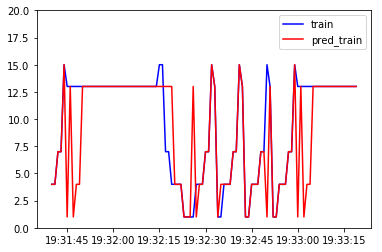

In [31]:
x = [datetime.datetime.fromtimestamp(1555961400) + datetime.timedelta(seconds=i) for i in range(86400)]
x1 = [i.time() for i in x]
x2=list()
for i in range(1,86400):
    if i%10==0:
        x2.append(x1[i])
    

#t = 100
#t1 = 300

t = 100
t1 = 200

plt.ylim(0, 20), #plt.xlim(0, 2*t), 
plt.plot(x[t:t1], trainY[t:t1], '-b', label='train'),
plt.plot(x[t:t1], pred_train[t:t1], '-r', label = 'pred_train')
print(trainY[10:20])
print(pred_train[10:20])
plt.legend(loc='upper right')
plt.show()


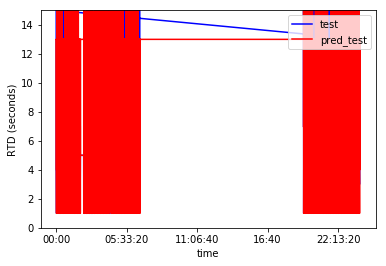

In [28]:
t = 1
t1 = 4000

plt.ylim(0, 15), #plt.xlim(0, 2*t), 
plt.plot(x2[t:t1], testY[t:t1], '-b', label='test'),
plt.plot(x2[t:t1], pred_test[t:t1], '-r', label = 'pred_test')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('RTD (seconds)')
plt.show()



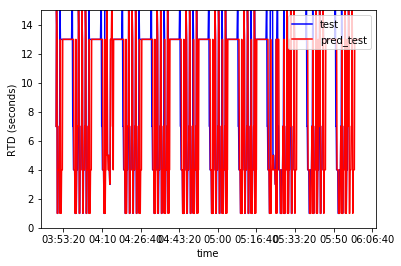

In [29]:
#@title
t = 3000
t1 = 3760
t2 = 3790
plt.ylim(0, 15), #plt.xlim(0, 2*t), 
plt.plot(x2[t:t1], testY[t:t1], '-b', label='test'),
plt.plot(x2[t:t2], pred_test[t:t2], '-r', label = 'pred_test')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('RTD (seconds)')
plt.show()


In [0]:
!ls